
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Subsurface Data Analytics 

## Basic Plotting of Subsurface Data


### Michael Pyrcz, Associate Professor, University of Texas at Austin 

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)


In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        

We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import numpy as np                        # ndarrys for gridded data
import pandas as pd                       # DataFrames for tabular data
import os                                 # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting

# Principal component analysis

In [3]:
# Principal component analysis functions
# We can use this function for generalization

def PCA (X):
    """Find principal component (i.e., eigen vector) and their weight(i.e., eigen values).
    :param X: X is matrix whose rows indicate individual data and columns are different parameters
    : ex. X = [[porosity_1, perm_1, facies_1, AI_1],[porosity_2, perm_2, facies_2, AI_2],...,[porosity_N, perm_N, facies_N, AI_N]]
    :Retrun: Pincipal component (V), their weight (W), and scales (S_1 and S_2) used in standarization
    """
    
    # Normalize between -1 to 1 for all parameter
    X_min = X.min(0); X_max = X.max(0);
    X_n = (X - X_min)/(X_max-X_min)*2 - 1
    
    # Calculate Covariance matrix of X_n
    X_err = X_n - X_n.mean(0)
    Cov = np.dot(X_err.T, X_err)

    # Principal component and weight
    W, V = np.linalg.eig(Cov)
    
    # rescale parameter
    S_1 = (X_max-X_min)
    S_2 = X_min
    
    ind = np.argsort (W)
    return W[ind[::-1]], V[:,ind[::-1]], S_1, S_2

def PCA_project(X, W, V,  S_1, S_2,n = 2):
    """Find principal component (i.e., eigen vector) and their weight(i.e., eigen values).
    :param X: X is matrix whose rows indicate individual data and columns are different parameters
    : ex. X = [[porosity_1, perm_1, facies_1, AI_1],[porosity_2, perm_2, facies_2, AI_2],...,[porosity_N, perm_N, facies_N, AI_N]]
    :Param W and V: Principal component and their weight
    :Param S_1&S_2: scales for standardization
    :Param n: The number of dimensionality that we want to conserve. ( < # of total parameters)
    :Retrun: Projected data
    """
    
    V_sel = V[:,0:n]                                # Selected PC
    X_n = (X-S_2)/(S_1)*2-1                         # Standardize X again
    X_pro = np.dot(X_n, V_sel)                      # Project to PC
    X_n_repro = np.dot(X_pro,np.linalg.pinv(V_sel)) # Project back to Original parameters
    X_reconstruct = (X_n_repro+1)/2*S_1+S_2         # Rescale data to orignal range, get reconstruct 
    
    return X_reconstruct

In [4]:
os.chdir("c:/PGE383")                     # set the working directory

In [5]:
df = pd.read_csv('12_sample_data.csv')    # load our data table (wrong name!)
df = df.sample(frac=.30, random_state = 73073); df = df.reset_index()
df['logPerm'] = np.log10(df['Perm'].values)

In [6]:
df.head(n=13)                             # we could also use this command for a table preview

,index,X,Y,Facies,Porosity,Perm,AI,logPerm
0,72,250,50,0,0.139637,0.347182,4747.274043,-0.459442
1,153,650,750,0,0.170732,10.720560,4535.625583,1.030217
2,258,80,669,1,0.244345,3222.716042,2696.102930,3.508222
3,56,200,150,0,0.167125,3.042590,5500.997419,0.483243
4,303,60,929,1,0.216253,400.298484,3959.934912,2.602384
5,374,750,699,0,0.159171,9.224292,5263.064063,0.964933
6,333,340,549,0,0.170881,84.471492,2918.232227,1.926710
7,1,50,850,1,0.237154,39.837129,3074.562617,1.600288
8,54,200,250,1,0.188043,57.804784,4997.078597,1.761964
9,311,250,579,1,0.215039,625.510541,2693.691341,2.796235


## 0) Scatter plot
Before we conduct, scatter plot helps us how the data parameters are correlated to each other.

C:\Users\mpyrc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\mpyrc\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\mpyrc\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org

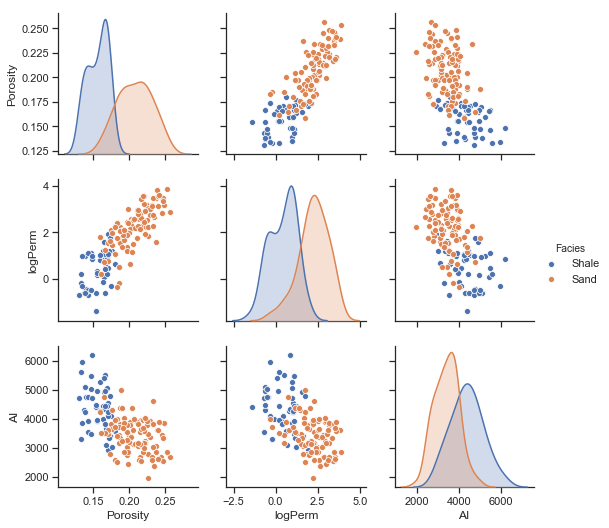

In [7]:
import seaborn as sns
sns.set(style="ticks")
df_subset = df.iloc[:,[4,7,6]]
df_subset['Facies']=np.zeros((df_subset.shape[0],1));
df_subset['Facies'][df['Facies']==1] = 'Sand'
df_subset['Facies'][df['Facies']==0] = 'Shale'
sns.pairplot(df_subset, hue = 'Facies')
plt.show()

## 1) Principal component and scree plot
Here we build a matrix X which has data of our interested metric (i.e., Porosity, logperm, and AI). Standardization is conducted to consider the different range of each parameter. Principal component is identical to eigen vector of covariance matrix and its weight is equal to each eigen value. Scree plot shows how much individual principal component preserve variability of our data. 

In [8]:
# Build matrix X 
X = np.array((df['Porosity'].values,df['logPerm'].values,df['AI'].values))
X= X.T

# Normalize between -1 to 1 for all parameter
X_min = X.min(0); X_max = X.max(0);
X_n = (X - X_min)/(X_max-X_min)*2 - 1

# Calculate Covariance matrix of X_n
X_err = X_n - X_n.mean(0)
Cov = np.dot(X_err.T, X_err)

# Principal component and weight
W, V = np.linalg.eig(Cov)


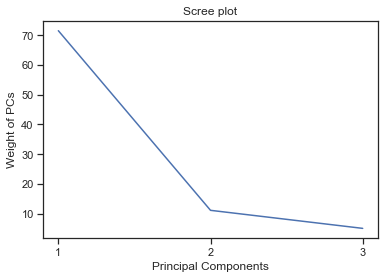

In [9]:
ind = np.argsort (W)
V = V[:,ind[::-1]]
# Scree plot
plt.plot(np.array(range(1,W.shape[0]+1)),W[ind[::-1]])
plt.xlabel('Principal Components')
plt.ylabel('Weight of PCs')
plt.title('Scree plot')
plt.xticks(np.arange(1,W.shape[0]+1, 1.0))
plt.show()

## 2) Dimensionality Reduction
Based on the above scree plot, we select proper number of dimension to reduce. Our current data has 3 dimensions but the scree plot shows that 1st and 2nd principal component have most of variability of our data. First we reduce our data dimension to 2 and then we reduced the dimension to 1 sequentially.

In [10]:
# reduced dimension and scales
n=2  # we reduce our data dimension to 2D
S_1 = (X_max-X_min)
S_2 = X_min

# Selected PC
V_sel = V[:,0:n]

# Standardize X again
X_n = (X-S_2)/(S_1)*2-1

# Project to PC
X_pro = np.dot(X_n, V_sel)

# Project back to Original parameters
X_n_repro = np.dot(X_pro,np.linalg.pinv(V_sel))

# Rescale data to orignal range, get reconstruct 
X_reconstruct = (X_n_repro+1)/2*S_1+S_2

C:\Users\mpyrc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


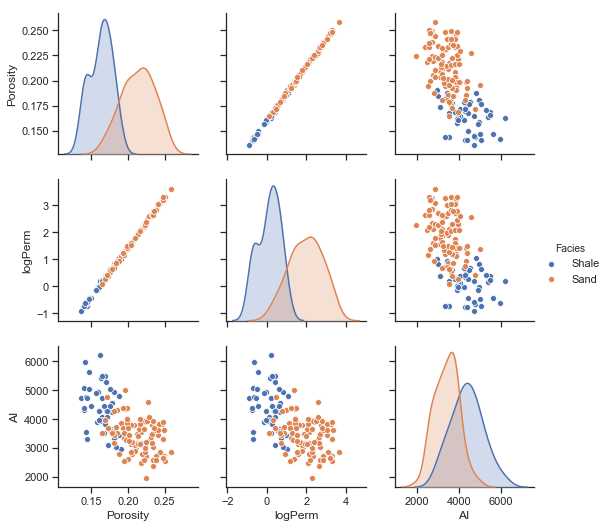

In [11]:
matrixA={}
matrixA['AI']=X_reconstruct[:,2]
matrixA['logPerm']=X_reconstruct[:,1]
matrixA['Porosity']=X_reconstruct[:,0]

df_reconstruct = pd.DataFrame(matrixA);
columnsTitles = ['Porosity', 'logPerm', 'AI']

df_reconstruct = df_reconstruct.reindex(columns=columnsTitles)

df_reconstruct['Facies']=np.zeros((df_reconstruct.shape[0],1));
df_reconstruct['Facies'][df['Facies']==1] = 'Sand'
df_reconstruct['Facies'][df['Facies']==0] = 'Shale'

sns.pairplot(df_reconstruct, hue = 'Facies')
plt.show()

In [12]:
# reduced dimension and scales
n=1  # we reduce our data dimension to 1D
S_1 = (X_max-X_min)
S_2 = X_min

# Selected PC
V_sel = V[:,0:n]

# Standardize X again
X_n = (X-S_2)/(S_1)*2-1

# Project to PC
X_pro = np.dot(X_n, V_sel)

# Project back to Original parameters
X_n_repro = np.dot(X_pro,np.linalg.pinv(V_sel))

# Rescale data to orignal range, get reconstruct 
X_reconstruct = (X_n_repro+1)/2*S_1+S_2

C:\Users\mpyrc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


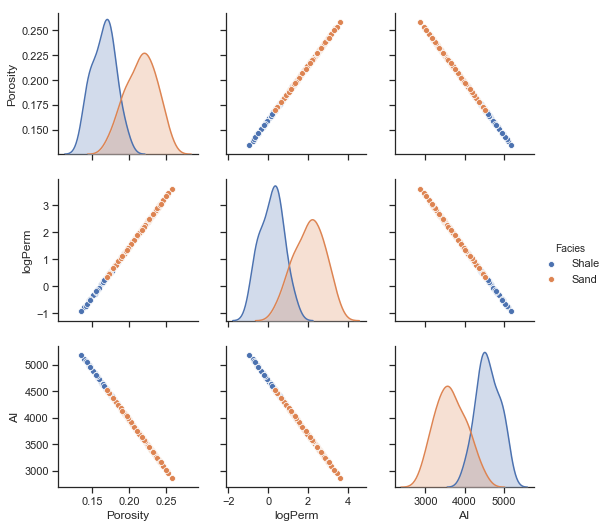

In [13]:
matrixA={}
matrixA['AI']=X_reconstruct[:,2]
matrixA['logPerm']=X_reconstruct[:,1]
matrixA['Porosity']=X_reconstruct[:,0]

df_reconstruct = pd.DataFrame(matrixA);
columnsTitles = ['Porosity', 'logPerm', 'AI']

df_reconstruct = df_reconstruct.reindex(columns=columnsTitles)

df_reconstruct['Facies']=np.zeros((df_reconstruct.shape[0],1));
df_reconstruct['Facies'][df['Facies']==1] = 'Sand'
df_reconstruct['Facies'][df['Facies']==0] = 'Shale'

sns.pairplot(df_reconstruct, hue = 'Facies')
plt.show()

Based on these result, we can further our demonstration to:
  1) PCA regression and
  2) PCA clustering

## 3) K-Mean Clustering

In [14]:
# reduced dimension and scales
n=2  # we reduce our data dimension to 1D
S_1 = (X_max-X_min)
S_2 = X_min

# Selected PC
V_sel = V[:,0:n]

# Standardize X again
X_n = (X-S_2)/(S_1)*2-1

# Project to PC
X_pro = np.dot(X_n, V_sel)

X_pro0=X_pro.copy()

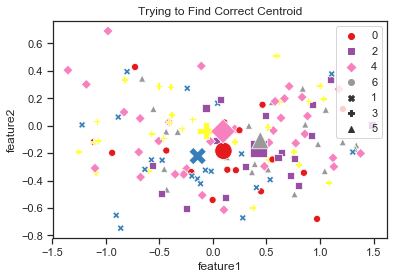

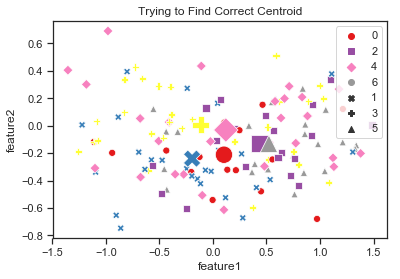

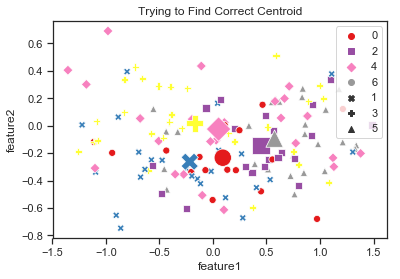

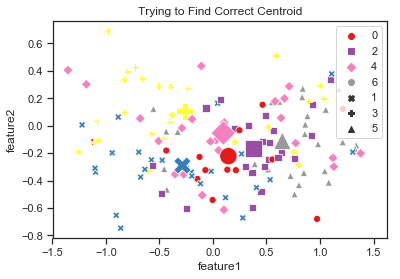

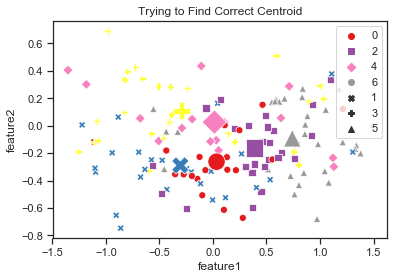

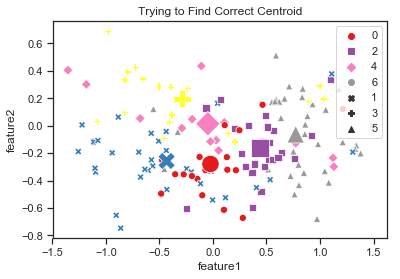

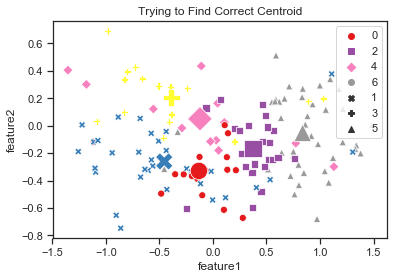

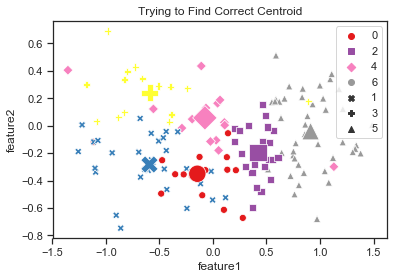

Change centroids


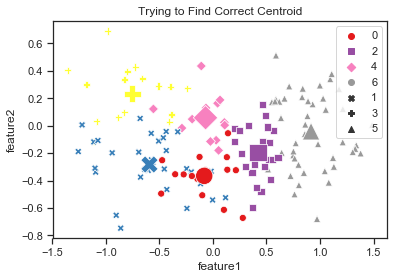

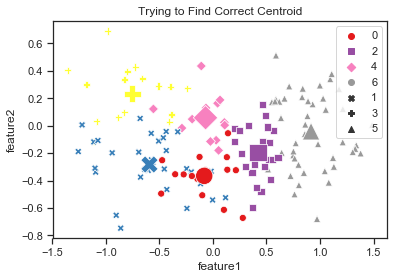

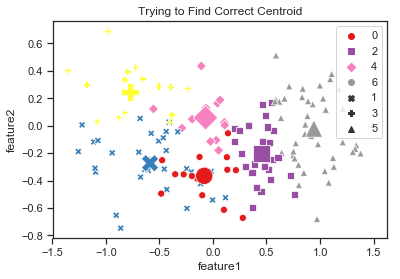

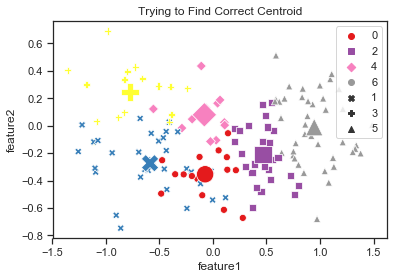

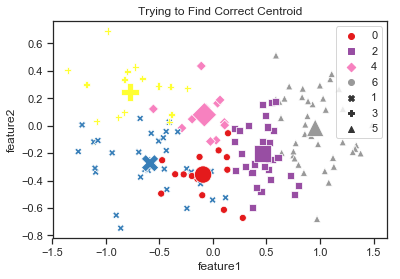

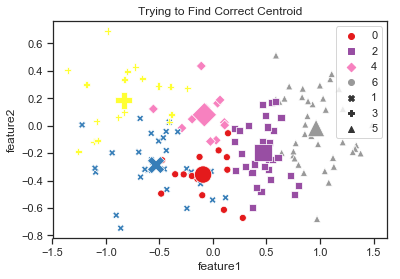

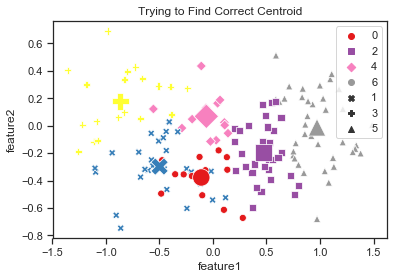

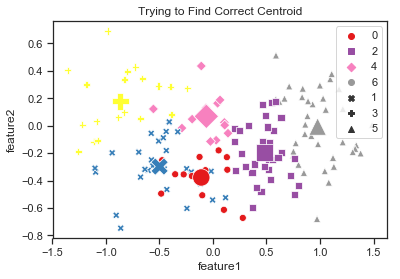

Change centroids
Change centroids
Change centroids
Change centroids
Success


In [15]:
# Perform K-Mean Clustering for Principal Component X_pro
# Initialization cluster centroid

#append predefined faceis to X_pro 
X_pro=np.c_[X_pro0,df['Facies']]
N=6;  # classify data into 4 clusters
X_len=X_pro.shape[0] # define data set length
M=X_pro.shape[1] #length of feature space
Cd=np.ones(X_len) # assign weight to data
Cm=np.ones(M);Cm[-1]=10**1;  # assign weight to properties, give predefined facies higher weight
# randomly initialize centroids
idx=np.random.randint(X_len,size=N)
X_center=np.vstack(X_pro[idx,:])
Mode=2 #mode used to measure 'distance'

# Change centroid until converge 
changed=True
cluster_mat =np.random.randint(N,size=(X_len,2)); # construct matrix to store type of each data and their distance; 1st column is for types, 2nd column is for distance          
MM=0;
while(changed and MM<100):      
    MM+=1;
    changed = False
    for i in range(X_len):
        mindist = np.inf
        minindex = -1
        for j in range(N): #find centroid closest to current data
            dist = Cd[i]*np.linalg.norm(X_center[j,:]-X_pro[i,:],ord=Mode)
            if dist < mindist:
                mindist = dist
                minindex = j #find centroid closest to current data point
        if cluster_mat[i,0] != minindex: #check if it is the same centroid
            changed = True
        cluster_mat[i,:] = minindex,dist #assign centroid index and distance to each data point
        for cent in range(N): # calculate location of centroid after update
            X_same = X_pro[cluster_mat[:,0]==cent,:]
            X_center[cent,:] = np.mean(X_same, axis=0)

        if (i%20==0 and MM<3):
            ax=sns.scatterplot(x=X_pro[:,0],y=X_pro[:,1],hue=cluster_mat[:,0],palette="Set1",style=cluster_mat[:,0],s=50)
            sns.scatterplot(X_center[:,0],y=X_center[:,1],hue=np.arange(0,N),palette="Set1",style=np.arange(0,N),s=300,legend=False)
            sns.set_palette(sns.color_palette(palette="bright",n_colors=N))
            plt.xlabel("feature1")
            plt.ylabel("feature2")
            plt.title("Trying to Find Correct Centroid")
            plt.show()
    print("Change centroids")
    if(changed==False):
        print("Success")

In [ ]:
# general purpose K_mean clustering
def K_Mean(X_len,N,X_pro, Cd,Cm, Mode):
    """Perform K-mean clustering.
    :param X_len: Dimension of data space
    :param N: Dimension of feature space
    :Param X_pro: data matrix after being projected to principal component axes
    :Param Cd: data weights
    :Param Cm: Feature weights
    :Param Mode: The mode to measure "distance"     
    :Retrun: Projected data
    """
# randomly initialize centroids
idx=np.random.randint(X_len,size=N)
X_center=np.vstack(X_pro[idx,:])    
changed=True
cluster_mat =np.random.randint(N,size=(X_len,2)); # construct matrix to store type of each data and their distance; 1st column is for types, 2nd column is for distance          
MM=0;
while(changed and MM<100):      
    MM+=1;
    changed = False
    for i in range(X_len):
        mindist = np.inf
        minindex = -1
        for j in range(N): #find centroid closest to current data
            dist = Cd[i]*np.linalg.norm(X_center[j,:]-X_pro[i,:],ord=Mode)
            if dist < mindist:
                mindist = dist
                minindex = j #find centroid closest to current data point
        if cluster_mat[i,0] != minindex: #check if it is the same centroid
            changed = True
        cluster_mat[i,:] = minindex,dist #assign centroid index and distance to each data point
        for cent in range(N): # calculate location of centroid after update
            X_same = X_pro[cluster_mat[:,0]==cent,:]
            X_center[cent,:] = np.mean(X_same, axis=0)

        if (i%20==0 and MM<3):
            ax=sns.scatterplot(x=X_pro[:,0],y=X_pro[:,1],hue=cluster_mat[:,0],palette="Set1",style=cluster_mat[:,0],s=50)
            sns.scatterplot(X_center[:,0],y=X_center[:,1],hue=np.arange(0,N),palette="Set1",style=np.arange(0,N),s=300,legend=False)
            sns.set_palette(sns.color_palette(palette="bright",n_colors=N))
            plt.xlabel("feature1")
            plt.ylabel("feature2")
            plt.title("Trying to Find Correct Centroid")
            plt.show()
    print("Change centroids")
    if(changed==False):
        print("Success")
    
    return X_reconstruct